### Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import re
import matplotlib.image as mpimg
import os
from itertools import product

# Полностью отключить все предупреждения
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams['font.family'] = 'serif'

### Base

In [3]:
def plot_response(folder, ax):
    
    # Загрузка данных, пропуская строки с комментариями (начинаются с #)
    data = pd.read_csv(
        folder + '/Si_rt.data',
        comment='#',
        delim_whitespace=True,
        header=None
    )
    
    # Назначим читаемые имена колонкам
    data.columns = [
        'time_fs',         # 1
        'Ac_ext_x',        # 2
        'Ac_ext_y',        # 3
        'Ac_ext_z',        # 4
        'E_ext_x',         # 5
        'E_ext_y',         # 6
        'E_ext_z',         # 7
        'Ac_tot_x',        # 8
        'Ac_tot_y',        # 9
        'Ac_tot_z',        #10
        'E_tot_x',         #11
        'E_tot_y',         #12
        'E_tot_z',         #13
        'Jm_x',         #14
        'Jm_y',         #15
        'Jm_z',         #16
    ]
    
    
    # 1:Time[fs] 2:Ac_ext_x[fs*V/Angstrom] 3:Ac_ext_y[fs*V/Angstrom] 4:Ac_ext_z[fs*V/Angstrom]
    #5:E_ext_x[V/Angstrom] 6:E_ext_y[V/Angstrom] 7:E_ext_z[V/Angstrom] 8:Ac_tot_x[fs*V/Angstrom]
    # 9:Ac_tot_y[fs*V/Angstrom] 10:Ac_tot_z[fs*V/Angstrom] 11:E_tot_x[V/Angstrom]
    # 12:E_tot_y[V/Angstrom] 13:E_tot_z[V/Angstrom]  14:Jm_x[1/fs*Angstrom^2] 15:Jm_y[1/fs*Angstrom^2] 16:Jm_z[1/fs*Angstrom^2]
    
    
    # Построим графики
    plt.figure(figsize=(10, 5))

    # Общий заголовок для всей фигуры
    plt.suptitle(' '.join(re.split('[/_]', folder)), fontsize=14)
    
    # Первый график: внешнее поле по z
    plt.subplot(2, 2, 1)
    plt.plot(data['time_fs'], data['E_ext_z'], label='E_ext_z', color='blue')
    plt.xlabel('Time [fs]')
    plt.ylabel('E [V/Å]')
    plt.title('External electric field z')
    plt.grid(True)
    #plt.legend()
    
    # Второй график: дипольный момент по z
    plt.subplot(2, 2, 4)
    plt.plot(data['time_fs'], data['Jm_'+ax], label='Dipole Moment z', color='magenta')
    plt.xlabel('Time [fs]')
    plt.ylabel('J [$fs^{-1} \cdot Å^{-2}$]')
    plt.title('Full matter current density')
    plt.grid(True)
    #plt.legend()
    
    plt.tight_layout()
    
    # Загрузка данных с указанием имен столбцов
    energy_data = pd.read_csv(
        folder + '/Si_rt_energy.data',
        comment='#',
        delim_whitespace=True,
        header=None,
        names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
    )
    
    # Построение графика изменения энергии во времени
    plt.subplot(2, 2, 3)
    plt.plot(energy_data['Time_fs'], energy_data['Delta_E_eV'], label='ΔE = E_total - E_initial', color='r')
    plt.xlabel('Time [fs]')
    plt.ylabel('E [eV]')
    plt.title('Full excitation energy per unit cell')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()
    
    # Загрузка данных с указанием имен столбцов
    data = pd.read_csv(
        folder + '/Si_pulse.data',
        comment='#',
        delim_whitespace=True,
        header=None
    )
    
    # Назначим читаемые имена колонкам
    data.columns = [
        'energy_eV',           # 1
        'Re_Jm_x',             # 2
        'Re_Jm_y',             # 3
        'Re_Jm_z',             # 4
        'Im_Jm_x',             # 5
        'Im_Jm_y',             # 6
        'Im_Jm_z',             # 7
        'Abs2_Jm_x',           # 8
        'Abs2_Jm_y',           # 9
        'Abs2_Jm_z',           #10
        'Re_E_ext_x',          #11
        'Re_E_ext_y',          #12
        'Re_E_ext_z',          #13
        'Im_E_ext_x',          #14
        'Im_E_ext_y',          #15
        'Im_E_ext_z',          #16
        'Abs2_E_ext_x',        #17
        'Abs2_E_ext_y',        #18
        'Abs2_E_ext_z',        #19
        'Re_E_tot_x',          #20
        'Re_E_tot_y',          #21
        'Re_E_tot_z',          #22
        'Im_E_tot_x',          #23
        'Im_E_tot_y',          #24
        'Im_E_tot_z',          #25
        'Abs2_E_tot_x',        #26
        'Abs2_E_tot_y',        #27
        'Abs2_E_tot_z',        #28
    ]

    Jw2 = data['Abs2_Jm_'+ax]
    energy = data['energy_eV']
    # Построение графика для 1 и 10 колонки
    plt.subplot(2, 2, 2)
    plt.plot(data['energy_eV'], data['Abs2_Jm_'+ax], label='', color='c')
    plt.xlabel('Energy [eV]')
    plt.ylabel('|J($\omega)|^2 [Å^{-4}]$')
    plt.yscale('log')
    plt.title('Power spectrum')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()
    plt.show()

    return energy, Jw2 

### Plots

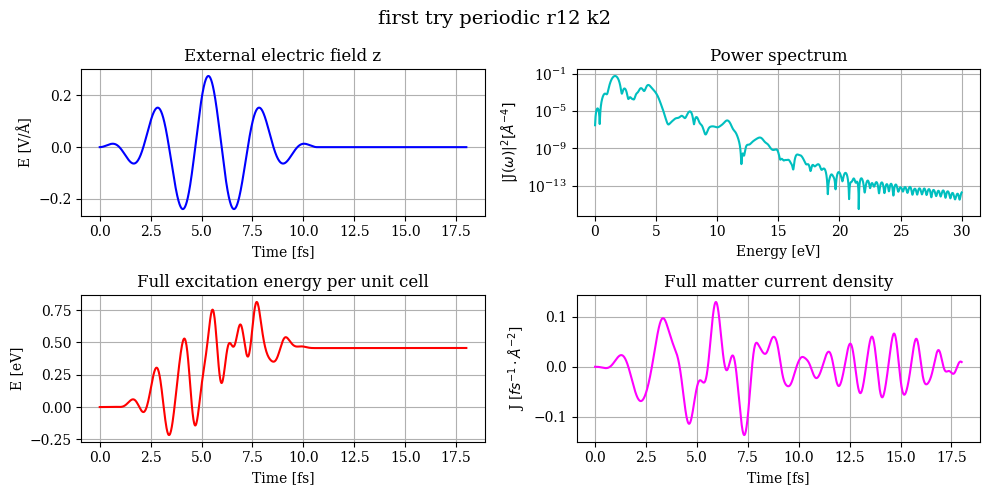

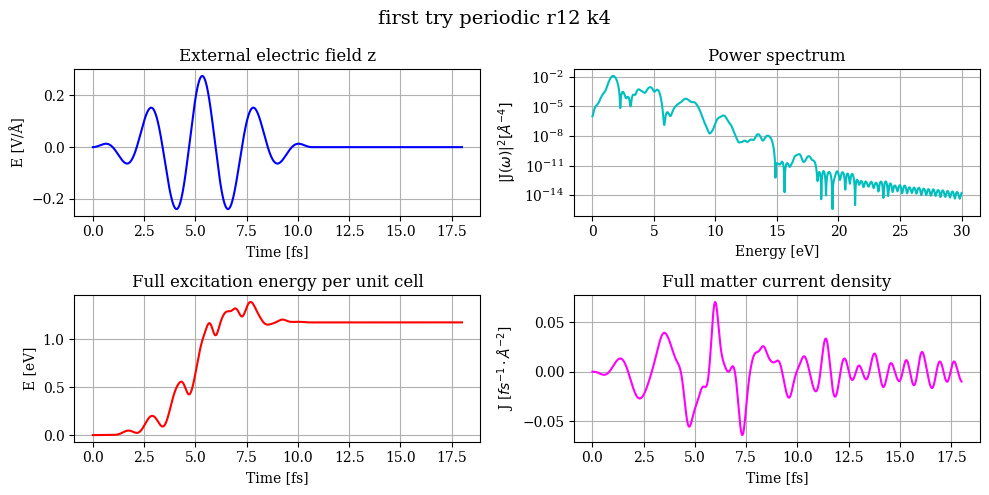

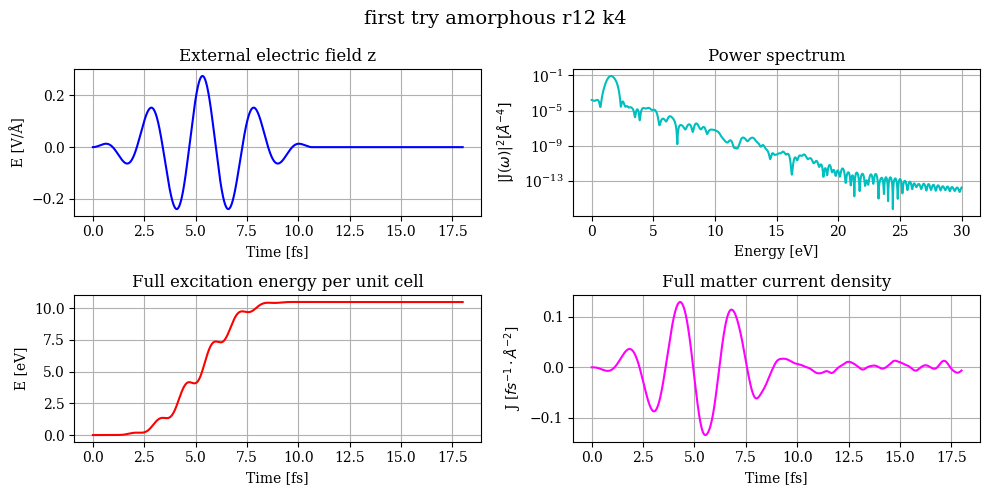

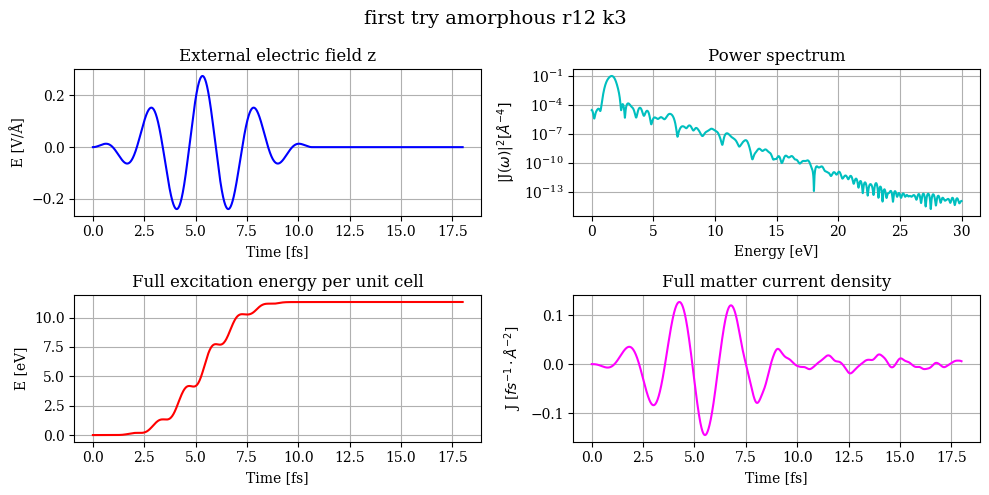

In [4]:
ax = 'z'
a = plot_response('first_try/periodic/r12_k2', ax)
E, Jw2_per = plot_response('first_try/periodic/r12_k4', ax)
E, Jw2_am = plot_response('first_try/amorphous/r12_k4', ax)
a = plot_response('first_try/amorphous/r12_k3', ax)
# a = plot_response('amorphous/r12_k2_weak', ax)

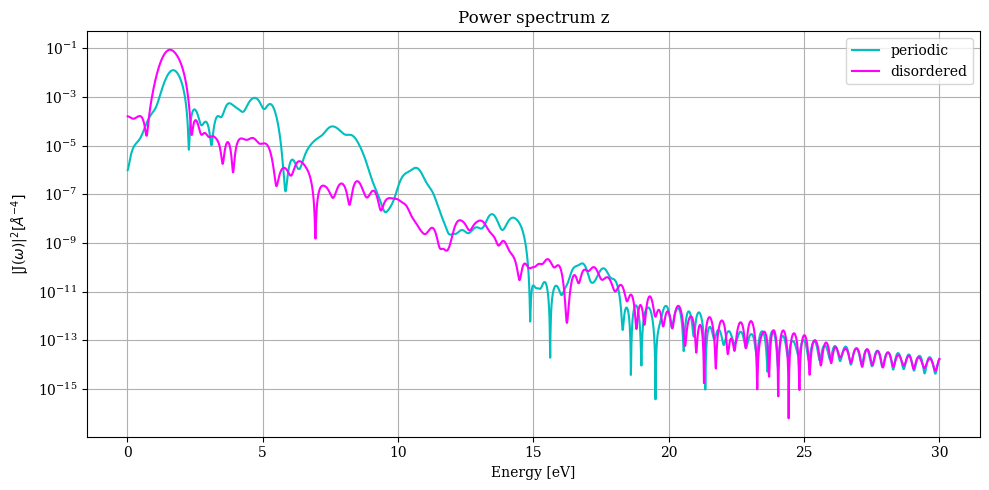

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(E, Jw2_per, label='periodic', color='c')
plt.plot(E, Jw2_am, label='disordered', color='magenta')
plt.xlabel('Energy [eV]')
plt.ylabel('|J($\omega)|^2 [Å^{-4}]$')
plt.yscale('log')
plt.title('Power spectrum z')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Nonlinear

In [25]:
def plot_nonlinear_response(folder, ax):
    
    # Загрузка данных, пропуская строки с комментариями (начинаются с #)
    data = pd.read_csv(
        folder + '/pulse_1e12_rt.data',
        comment='#',
        delim_whitespace=True,
        header=None
    )
    
    # Назначим читаемые имена колонкам
    data.columns = [
        'time_fs',         # 1
        'Ac_ext_x',        # 2
        'Ac_ext_y',        # 3
        'Ac_ext_z',        # 4
        'E_ext_x',         # 5
        'E_ext_y',         # 6
        'E_ext_z',         # 7
        'Ac_tot_x',        # 8
        'Ac_tot_y',        # 9
        'Ac_tot_z',        #10
        'E_tot_x',         #11
        'E_tot_y',         #12
        'E_tot_z',         #13
        'Jm_x',         #14
        'Jm_y',         #15
        'Jm_z',         #16
    ]
    
    t = data['time_fs']
    Jm = data['Jm_'+ax]
    El_f = data['E_ext_z']
    
    # 1:Time[fs] 2:Ac_ext_x[fs*V/Angstrom] 3:Ac_ext_y[fs*V/Angstrom] 4:Ac_ext_z[fs*V/Angstrom]
    #5:E_ext_x[V/Angstrom] 6:E_ext_y[V/Angstrom] 7:E_ext_z[V/Angstrom] 8:Ac_tot_x[fs*V/Angstrom]
    # 9:Ac_tot_y[fs*V/Angstrom] 10:Ac_tot_z[fs*V/Angstrom] 11:E_tot_x[V/Angstrom]
    # 12:E_tot_y[V/Angstrom] 13:E_tot_z[V/Angstrom]  14:Jm_x[1/fs*Angstrom^2] 15:Jm_y[1/fs*Angstrom^2] 16:Jm_z[1/fs*Angstrom^2]
    
    
    # Построим графики
    # plt.figure(figsize=(10, 7.5))
    plt.figure(figsize=(10, 2.5))
    
    # Общий заголовок для всей фигуры
    plt.suptitle(' '.join(re.split('[/_]', folder)), fontsize=14)
    
    # # Первый график: внешнее поле по z
    # plt.subplot(3, 2, 1)
    # plt.plot(data['time_fs'], data['E_ext_z'], label='E_ext_z', color='blue')
    # plt.xlabel('Time [fs]')
    # plt.ylabel('E [V/Å]')
    # plt.title('External electric field z')
    # plt.grid(True)
    # #plt.legend()
    
    # Второй график: дипольный момент по z
    # plt.subplot(3, 2, 4)
    plt.subplot(1, 2, 2)
    plt.plot(data['time_fs'], data['Jm_'+ax], label='Dipole Moment z', color='magenta')
    plt.xlabel('Time [fs]')
    plt.ylabel('J [$fs^{-1} \cdot Å^{-2}$]')
    plt.title('Full matter current density')
    plt.grid(True)
    #plt.legend()
    
    plt.tight_layout()
    
    # Загрузка данных с указанием имен столбцов
    energy_data = pd.read_csv(
        folder + '/pulse_1e12_rt_energy.data',
        comment='#',
        delim_whitespace=True,
        header=None,
        names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
    )
    
    # Построение графика изменения энергии во времени
    # plt.subplot(3, 2, 3)
    plt.subplot(1, 2, 1)
    plt.plot(energy_data['Time_fs'], energy_data['Delta_E_eV'], label='ΔE = E_total - E_initial', color='r')
    plt.xlabel('Time [fs]')
    plt.ylabel('E [eV]')
    plt.title('Full excitation energy per unit cell')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()

    del_E = energy_data['Delta_E_eV']
    
    # Загрузка данных с указанием имен столбцов
    data = pd.read_csv(
        folder + '/pulse_1e12_pulse.data',
        comment='#',
        delim_whitespace=True,
        header=None
    )
    
    # Назначим читаемые имена колонкам
    data.columns = [
        'energy_eV',           # 1
        'Re_Jm_x',             # 2
        'Re_Jm_y',             # 3
        'Re_Jm_z',             # 4
        'Im_Jm_x',             # 5
        'Im_Jm_y',             # 6
        'Im_Jm_z',             # 7
        'Abs2_Jm_x',           # 8
        'Abs2_Jm_y',           # 9
        'Abs2_Jm_z',           #10
        'Re_E_ext_x',          #11
        'Re_E_ext_y',          #12
        'Re_E_ext_z',          #13
        'Im_E_ext_x',          #14
        'Im_E_ext_y',          #15
        'Im_E_ext_z',          #16
        'Abs2_E_ext_x',        #17
        'Abs2_E_ext_y',        #18
        'Abs2_E_ext_z',        #19
        'Re_E_tot_x',          #20
        'Re_E_tot_y',          #21
        'Re_E_tot_z',          #22
        'Im_E_tot_x',          #23
        'Im_E_tot_y',          #24
        'Im_E_tot_z',          #25
        'Abs2_E_tot_x',        #26
        'Abs2_E_tot_y',        #27
        'Abs2_E_tot_z',        #28
    ]

    Jw2 = data['Abs2_Jm_'+ax]
    energy = data['energy_eV']
    # # Построение графика для 1 и 10 колонки
    # plt.subplot(3, 2, 2)
    # plt.plot(data['energy_eV'], data['Abs2_Jm_'+ax], label='', color='c')
    # plt.xlabel('Energy [eV]')
    # plt.ylabel('|J($\omega)|^2 [Å^{-4}]$')
    # plt.yscale('log')
    # plt.title('Power spectrum')
    # plt.grid(True)
    # #plt.legend()
    # plt.tight_layout()

        # Загрузка данных, пропуская строки с комментариями (начинаются с #)
    data = pd.read_csv(
        folder + '/pulse_1e6_rt.data',
        comment='#',
        delim_whitespace=True,
        header=None
    )
    
    # Назначим читаемые имена колонкам
    data.columns = [
        'time_fs',         # 1
        'Ac_ext_x',        # 2
        'Ac_ext_y',        # 3
        'Ac_ext_z',        # 4
        'E_ext_x',         # 5
        'E_ext_y',         # 6
        'E_ext_z',         # 7
        'Ac_tot_x',        # 8
        'Ac_tot_y',        # 9
        'Ac_tot_z',        #10
        'E_tot_x',         #11
        'E_tot_y',         #12
        'E_tot_z',         #13
        'Jm_x',         #14
        'Jm_y',         #15
        'Jm_z',         #16
    ]

    J_nonl = Jm - 10**3*data['Jm_'+ax]
    
    # plt.subplot(3, 2, 6)
    # plt.plot(data['time_fs'], Jm - 10**3*data['Jm_'+ax], label='', color='orange')
    # plt.xlabel('Time [fs]')
    # plt.ylabel('J [$fs^{-1} \cdot Å^{-2}$]')
    # plt.title('Nonlinear matter current density')
    # plt.grid(True)


    # Загрузка данных с указанием имен столбцов
    energy_data = pd.read_csv(
        folder + '/pulse_1e6_rt_energy.data',
        comment='#',
        delim_whitespace=True,
        header=None,
        names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
    )
    
    # # Построение графика изменения энергии во времени
    # plt.subplot(3, 2, 5)
    # plt.plot(energy_data['Time_fs'], del_E -10**6*energy_data['Delta_E_eV'], label='ΔE = E_total - E_initial', color='lime')
    # plt.xlabel('Time [fs]')
    # plt.ylabel('E [eV]')
    # plt.title('Nonlinear excitation energy per unit cell')
    # plt.grid(True)
    # #plt.legend()
    # plt.tight_layout()
    # plt.show()

    return t, energy, Jw2, El_f, J_nonl, Jm

### Plots

In [26]:
ax = 'z'

folders = [name for name in os.listdir('.') if os.path.isdir(os.path.join('.', name))]

folders = [f for f in folders if f.startswith('c')]
folders = sorted(folders)

print(folders)

['c221_s0.00_r12_k10_a1_i500_t9', 'c221_s0.00_r12_k6_a1_i500_t9', 'c221_s0.00_r12_k8_a1_i500_t9', 'c222_s0.00_r12_k10_a1_i500_t9', 'c222_s0.00_r12_k6_a1_i500_t9', 'c222_s0.00_r12_k8_a1_i500_t9']


In [27]:
def extract_c_num(s):
    # Вырезаем число после 'c' до '_'
    start = s.index('c') + 1
    end = s.index('_', start)
    return int(s[start:end])

def extract_k_num(s):
    # Вырезаем число после '_k' до следующего '_'
    start = s.index('_k') + 2
    end = s.index('_', start)
    return int(s[start:end])

# Сортируем по кортежу (число после c, число после k)
sorted_folders = sorted(folders, key=lambda s: (extract_c_num(s), extract_k_num(s)))

sorted_folders

['c221_s0.00_r12_k6_a1_i500_t9',
 'c221_s0.00_r12_k8_a1_i500_t9',
 'c221_s0.00_r12_k10_a1_i500_t9',
 'c222_s0.00_r12_k6_a1_i500_t9',
 'c222_s0.00_r12_k8_a1_i500_t9',
 'c222_s0.00_r12_k10_a1_i500_t9']

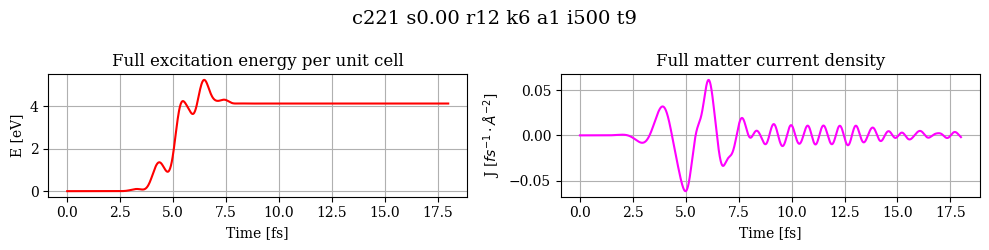

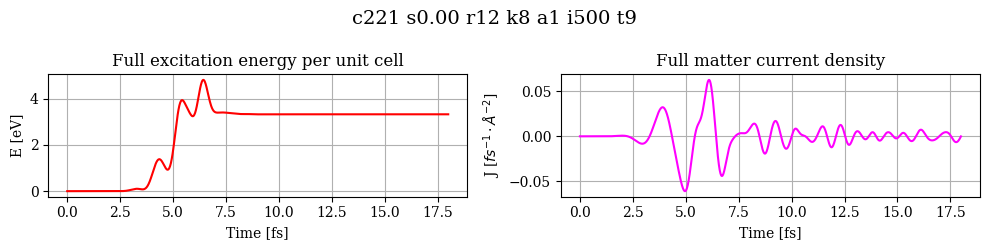

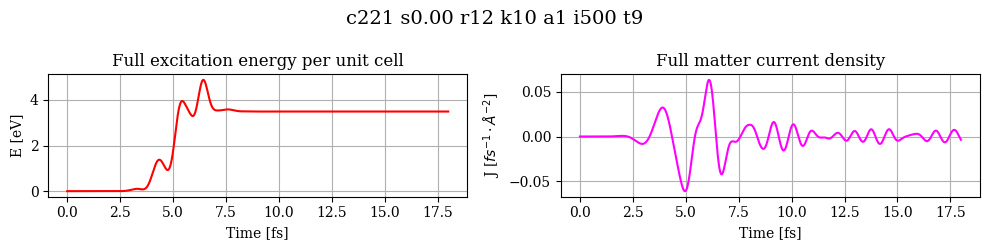

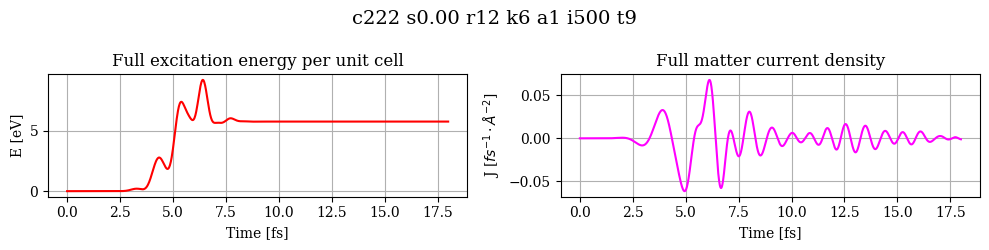

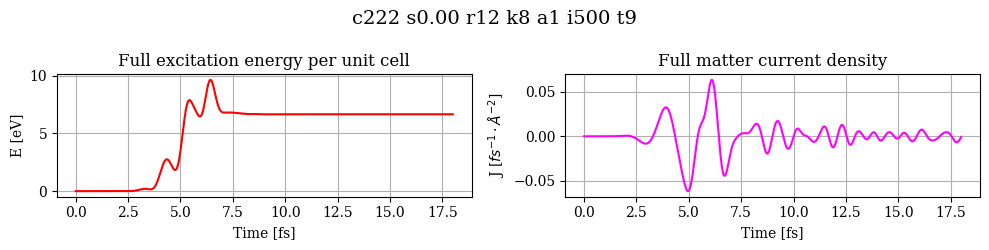

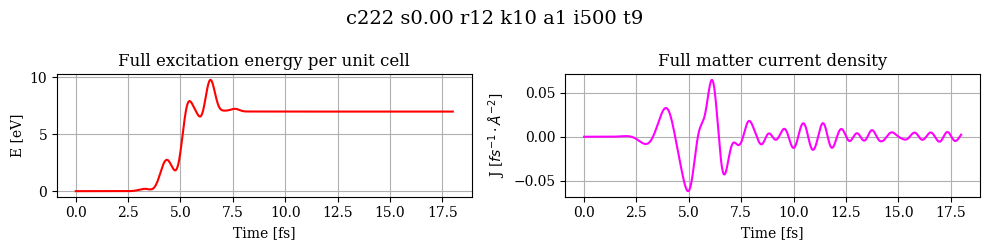

In [28]:
for folder in sorted_folders:
    t, E, Jw2_am, El_f, J_nonl, J = plot_nonlinear_response(folder, ax)

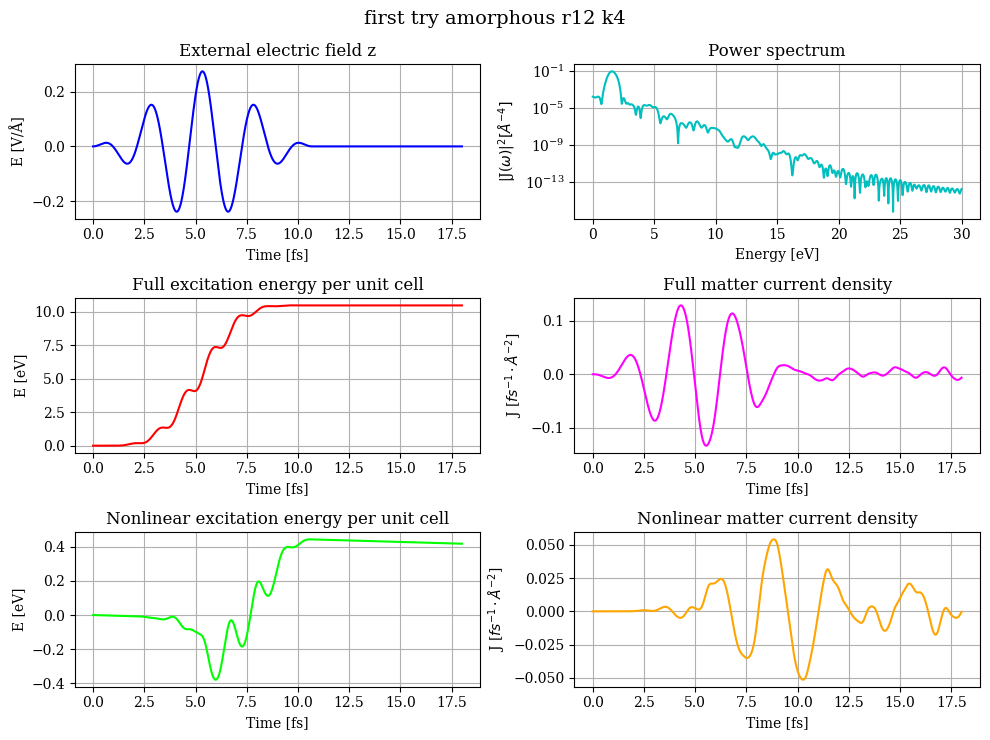

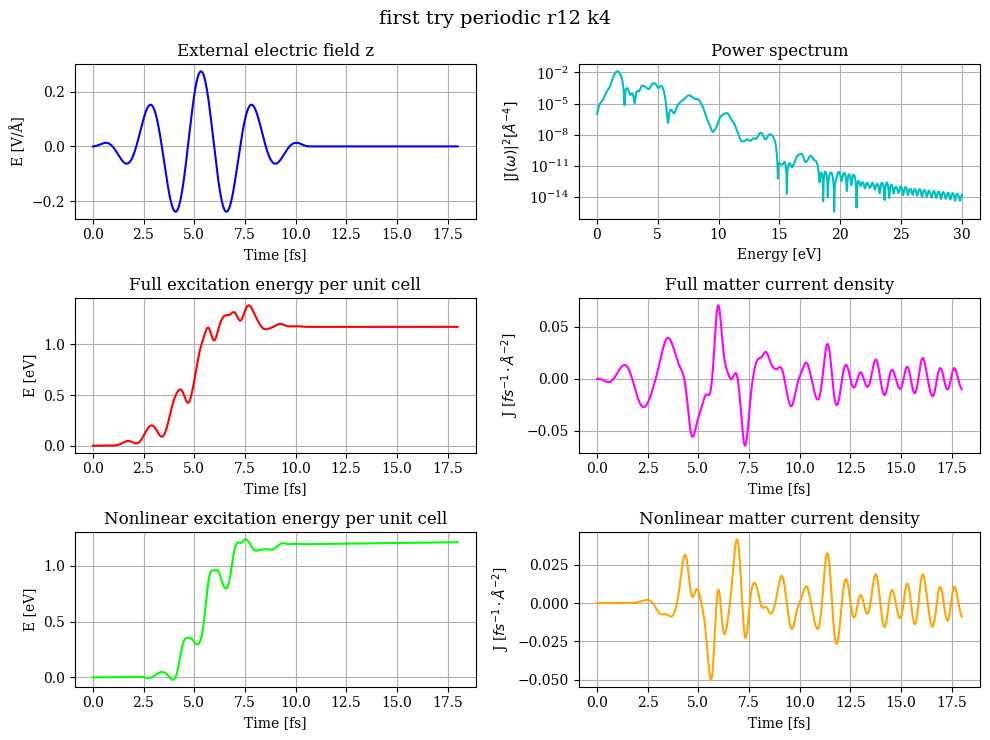

In [7]:
# t, E, Jw2_am, El_f, J_nonl, J = plot_nonlinear_response('first_try/amorphous/r12_k4', ax)
# t, E, Jw2_am, El_f, J_nonl, J = plot_nonlinear_response('first_try/periodic/r12_k4', ax)

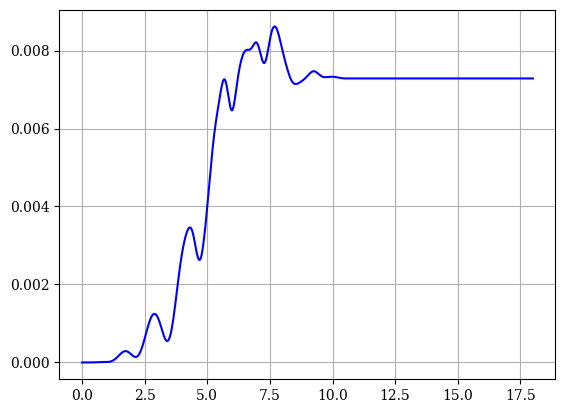

In [8]:
product = El_f * J

# Разность по времени
dt = np.diff(t, prepend=t[0])  # prepend чтобы сохранить размер

# Накопленный интеграл (приближение методом прямоугольников)
integral_cumulative = np.cumsum(product * dt)

# Теперь integral_cumulative[i] — это интеграл от 0 до t[i]. почему минус???
# plt.plot(t, J)
# plt.plot(t, El_f)
plt.plot(t, -integral_cumulative, color='b')
plt.grid()

### Generating 1D chain

In [9]:
import numpy as np

# Parameters
num_rows = 5  # Adjust this to generate the desired number of rows
step_size = 1.2

# Generate symmetric values around zero
z_values = np.arange(-num_rows * step_size, num_rows * step_size + step_size, step_size)

# Ensure symmetry around zero by excluding zero if it's present
z_values = z_values[z_values != 0]

# Create the data
data = []
for z in z_values:
    data.append(["'C'", 0.0, z, 1])

# Print the generated data
for row in data:
    print(" ".join(map(str, row)))

'C' 0.0 -6.0 1
'C' 0.0 -4.8 1
'C' 0.0 -3.5999999999999996 1
'C' 0.0 -2.3999999999999995 1
'C' 0.0 -1.1999999999999993 1
'C' 0.0 8.881784197001252e-16 1
'C' 0.0 1.200000000000001 1
'C' 0.0 2.400000000000002 1
'C' 0.0 3.6000000000000014 1
'C' 0.0 4.800000000000001 1
'C' 0.0 6.000000000000002 1


In [10]:
import numpy as np

def generate_data(num_lines):
    # Calculate the number of steps (excluding zero)
    steps = (num_lines - 1) // 2
    # Generate symmetric values around zero with a step of 1.2
    values = np.round(np.linspace(-steps * 1.2, steps * 1.2, num_lines), 2)
    # Create the data lines
    data = [f"'C'    0.000000    0.000000    {value:6.2f}  1" for value in values]
    return data

# Example usage
num_lines = 11  # Specify the number of lines you want
data = generate_data(num_lines)
for line in data:
    print(line)

'C'    0.000000    0.000000     -6.00  1
'C'    0.000000    0.000000     -4.80  1
'C'    0.000000    0.000000     -3.60  1
'C'    0.000000    0.000000     -2.40  1
'C'    0.000000    0.000000     -1.20  1
'C'    0.000000    0.000000      0.00  1
'C'    0.000000    0.000000      1.20  1
'C'    0.000000    0.000000      2.40  1
'C'    0.000000    0.000000      3.60  1
'C'    0.000000    0.000000      4.80  1
'C'    0.000000    0.000000      6.00  1


In [11]:
import numpy as np

# Parameters
num_rows = 20  # Specify the number of rows to generate
mean = 0
std_dev = 0.3  # Standard deviation for noise

# Generate the base values
base_values = np.arange(-5, 6, 1.2)

# Generate random noise
noise = np.random.normal(mean, std_dev, len(base_values))

# Combine base values with noise
noisy_values = np.round(base_values + noise, 2)

# Create the 'C' column
c_column = np.full(len(noisy_values), "  'C'")

# Stack the columns
data = np.column_stack((c_column, np.zeros(len(noisy_values)), np.zeros(len(noisy_values)), noisy_values, np.array(['1'] * len(noisy_values), dtype=object)))

# Print the result
for row in data:
    print(" ".join(map(str, row)))

  'C' 0.0 0.0 -4.76 1
  'C' 0.0 0.0 -4.03 1
  'C' 0.0 0.0 -2.75 1
  'C' 0.0 0.0 -1.03 1
  'C' 0.0 0.0 -0.05 1
  'C' 0.0 0.0 1.31 1
  'C' 0.0 0.0 2.28 1
  'C' 0.0 0.0 3.18 1
  'C' 0.0 0.0 5.0 1
  'C' 0.0 0.0 5.75 1


In [12]:
len(data)

10

### Si 3D generate

In [6]:
coords = np.array([
    [0.00, 0.00, 0.00],
    [0.25, 0.25, 0.25],
    [0.50, 0.00, 0.50],
    [0.00, 0.50, 0.50],
    [0.50, 0.50, 0.00],
    [0.75, 0.25, 0.75],
    [0.25, 0.75, 0.75],
    [0.75, 0.75, 0.25],
])

x, y, z = coords.T

### Func for generating input files

In [7]:
def create_cell(nx_max, ny_max, nz_max, dev): 
    
    atoms_data = []
    
    for nx, ny, nz in np.ndindex(nx_max, ny_max, nz_max):
        for i in range(8):
            
            rx, ry, rz = np.clip(np.random.normal(0, dev, 3),-2*dev ,2*dev)
    
            xval = x[i]/nx_max + nx/nx_max
            yval = y[i]/ny_max + ny/ny_max
            zval = z[i]/nz_max + nz/nz_max
            
            if 0 < xval+rx < 1:
                xval+=(rx/nx_max)
            if 0 < yval+ry < 1:
                yval+=(ry/ny_max)
            if 0 < zval+rz < 1:
                zval+=(rz/nz_max)
        
            atoms_data.append(f"  'Si'    {xval:.3f}    {yval:.3f}    {zval:.3f}    1") 
        
        atoms_data.append('')
    

    return atoms_data

In [31]:
generate_input_files('gs', 2, 1, 2, 0, 12, 2, 1, 500, 9)

In [290]:
# c - cell, s - sigma, i - number of max iterations, t - threshold of convergence, a - factor for number of states,
# r and k -- nums for r- and k- grids for 8 atoms in the cell
# input_types: 'gs', 'pulse', 'weak_pulse', 'response'

In [16]:
def generate_input_files(input_type, nx_max, ny_max, nz_max, dev, num_r, num_k, a, num_it, num_thr):
    
        
    atoms_data = create_cell(nx_max, ny_max, nz_max, dev)
    
    
    if input_type == 'gs':
        with open('base_inputs/Si_gs.inp', 'r') as file:
            lines = file.readlines()
    
    
    if input_type == 'pulse' or input_type == 'weak_pulse':
        with open('base_inputs/Si_rt_pulse.inp', 'r') as file:
            lines = file.readlines()
    
    
    if input_type == 'response':
        with open('base_inputs/Si_rt_response.inp', 'r') as file:
            lines = file.readlines()
    
    
            
    # if input_type == 'gs' or input_type == 'pulse':
    #     # Заменяем строку для названия output файлов
    #     for i, line in enumerate(lines):
    #         if 'sysname' in line:
    #             lines[i] = f"  sysname = 'Si_c{nx_max}{ny_max}{nz_max}_s{5.43*dev:.2f}_r{num_r}_k{num_k}_a{a}_i{num_it}_t{num_thr}'\n"
    
    
    # if input_type == 'weak_pulse':
    #     # Заменяем строку для названия output файлов
    #     for i, line in enumerate(lines):
    #         if 'sysname' in line:
    #             lines[i] = f"  sysname = 'Si_weak_c{nx_max}{ny_max}{nz_max}_s{5.43*dev:.2f}_r{num_r}_k{num_k}_a{a}_i{num_it}_t{num_thr}'\n"


    if input_type == 'weak_pulse':
        # Заменяем строку для названия output файлов
        for i, line in enumerate(lines):
            if 'sysname' in line:
                lines[i] = f"  sysname = 'pulse_1e6'\n"
    
    # if input_type == 'response':
    #     # Заменяем строку для названия output файлов
    #     for i, line in enumerate(lines):
    #         if 'sysname' in line:
    #             lines[i] = f"  sysname = 'Si_response_c{nx_max}{ny_max}{nz_max}_s{5.43*dev:.2f}_r{num_r}_k{num_k}_a{a}_i{num_it}_t{num_thr}'\n"
        
    
    # Заменяем строку для al(1:3)
    for i, line in enumerate(lines):
        if 'al(1:3)' in line:
            lines[i] = f"  al(1:3) = {nx_max*5.43:.2f}d0, {ny_max*5.43:.2f}d0, {nz_max*5.43:.2f}d0\n"
    
    # Заменяем строку для num_rgrid(1:3)
    for i, line in enumerate(lines):
        if 'num_rgrid(1:3)' in line:
            lines[i] = f"  num_rgrid(1:3) = {nx_max*num_r:.0f}, {ny_max*num_r:.0f}, {nz_max*num_r:.0f}\n"
    
    # Заменяем строку для num_kgrid(1:3)
    for i, line in enumerate(lines):
        if 'num_kgrid(1:3)' in line:
            lines[i] = f"  num_kgrid(1:3) = {num_k/nx_max:.0f}, {num_k/ny_max:.0f}, {num_k/nz_max:.0f}\n"

    # # Заменяем строку для num_kgrid(1:3)
    # for i, line in enumerate(lines):
    #     if 'num_kgrid(1:3)' in line:
    #         lines[i] = f"  num_kgrid(1:3) = {num_k:.0f}, {num_k:.0f}, {num_k:.0f}\n"
    
    
    start_idx = None
    end_idx = None
    
    # Находим места начала и конца для замены количества атомов и электронов
    for i, line in enumerate(lines):
        if 'nelem  =' in line:
            start_idx = i
        if '/' in line and start_idx is not None:
            end_idx = i
            break
    
    
    n_data = [f"  natom  = {8*nx_max*ny_max*nz_max:.0f}", f"  nelec  = {32*nx_max*ny_max*nz_max:.0f}", f"  nstate = {a*32*nx_max*ny_max*nz_max:.0f}"]
    
    # Заменяем блок координат
    lines[start_idx + 1:end_idx] = [line + '\n' for line in n_data]
    
    
    # Заменяем старые координаты атомов новыми
    start_idx = None
    end_idx = None
    
    # Находим места начала и конца для замены атомных координат
    for i, line in enumerate(lines):
        if '&atomic_red_coor' in line:
            start_idx = i
        if '!--- Format' in line and start_idx is not None:
            end_idx = i
            break
    
    # Заменяем блок координат
    lines[start_idx + 1:end_idx] = [line + '\n' for line in atoms_data]
    
    
    if input_type == 'weak_pulse':
        # Заменяем мощность
        for i, line in enumerate(lines):
            if 'I_wcm2_1 =' in line:
                lines[i] = "  I_wcm2_1 = 1.0d6\n"
    
    
    if input_type == 'gs':
        # Заменяем строку для nscf
        for i, line in enumerate(lines):
            if 'nscf' in line:
                lines[i] = f"  nscf      = {num_it:.0f}\n"
        
        # Заменяем строку для threshold
        for i, line in enumerate(lines):
            if 'threshold =' in line:
                lines[i] = f"  threshold = 1.0d-{num_thr:.0f}\n"
    
    fold_name = f"c{nx_max}{ny_max}{nz_max}_s{5.43*dev:.2f}_r{num_r}_k{num_k}_a{a}_i{num_it}_t{num_thr}"
    
    if input_type == 'gs':
        os.mkdir("generated/"+fold_name)
    
    if input_type == 'gs':
        # Сохраняем изменения в файл
        with open("generated/" + fold_name + f"/Si_gs_c{nx_max}{ny_max}{nz_max}_s{5.43*dev:.2f}_r{num_r}_k{num_k}_a{a}_i{num_it}_t{num_thr}.inp", 'w') as file:
            file.writelines(lines)
    
    if input_type == 'pulse':
        # Сохраняем изменения в файл
        with open("generated/" + fold_name + f"/Si_rt_pulse_c{nx_max}{ny_max}{nz_max}_s{5.43*dev:.2f}_r{num_r}_k{num_k}_a{a}_i{num_it}_t{num_thr}.inp", 'w') as file:
            file.writelines(lines)
    
    if input_type == 'weak_pulse':
        # Сохраняем изменения в файл
        with open("generated/" + fold_name + f"/Si_weak_rt_pulse_c{nx_max}{ny_max}{nz_max}_s{5.43*dev:.2f}_r{num_r}_k{num_k}_a{a}_i{num_it}_t{num_thr}.inp", 'w') as file:
            file.writelines(lines)
    
    if input_type == 'response':
        # Сохраняем изменения в файл
        with open("generated/" + fold_name + f"/Si_response_rt_pulse_c{nx_max}{ny_max}{nz_max}_s{5.43*dev:.2f}_r{num_r}_k{num_k}_a{a}_i{num_it}_t{num_thr}.inp", 'w') as file:
            file.writelines(lines)

In [17]:
devs = np.linspace(0, 0.1, 1)
ns = [(2, 2, 1), (2, 2, 2)]
num_rs = [12]
num_ks = [6, 8, 10]

for (nx, ny, nz), dev_val, r, k in product(ns, devs, num_rs, num_ks):
    
    generate_input_files('gs', nx, ny, nz, dev_val, r, k, 1, 500, 9)
    generate_input_files('pulse', nx, ny, nz, dev_val, r, k, 1, 500, 9)
    generate_input_files('weak_pulse', nx, ny, nz, dev_val, r, k, 1, 500, 9)
    generate_input_files('response', nx, ny, nz, dev_val, r, k, 1, 500, 9)

In [11]:
devs = np.linspace(0, 0.1, 1)
devs

array([0.])

### Plots for generated

In [282]:
part_name = f"c{nx_max}{ny_max}{nz_max}_s0_r{num_r}_k{num_k}_a{a}_i{num_it}_t{num_thr}"
print(part_name)

c121_s0_r12_k2_a1_i1000_t9


In [115]:
def plot_response_generated(folder, ax, part_name):
    
    # Загрузка данных, пропуская строки с комментариями (начинаются с #)
    data = pd.read_csv(
        folder + '/Si_' + part_name + '_rt.data',
        comment='#',
        delim_whitespace=True,
        header=None
    )
    
    # Назначим читаемые имена колонкам
    data.columns = [
        'time_fs',         # 1
        'Ac_ext_x',        # 2
        'Ac_ext_y',        # 3
        'Ac_ext_z',        # 4
        'E_ext_x',         # 5
        'E_ext_y',         # 6
        'E_ext_z',         # 7
        'Ac_tot_x',        # 8
        'Ac_tot_y',        # 9
        'Ac_tot_z',        #10
        'E_tot_x',         #11
        'E_tot_y',         #12
        'E_tot_z',         #13
        'Jm_x',         #14
        'Jm_y',         #15
        'Jm_z',         #16
    ]
    
    
    # 1:Time[fs] 2:Ac_ext_x[fs*V/Angstrom] 3:Ac_ext_y[fs*V/Angstrom] 4:Ac_ext_z[fs*V/Angstrom]
    #5:E_ext_x[V/Angstrom] 6:E_ext_y[V/Angstrom] 7:E_ext_z[V/Angstrom] 8:Ac_tot_x[fs*V/Angstrom]
    # 9:Ac_tot_y[fs*V/Angstrom] 10:Ac_tot_z[fs*V/Angstrom] 11:E_tot_x[V/Angstrom]
    # 12:E_tot_y[V/Angstrom] 13:E_tot_z[V/Angstrom]  14:Jm_x[1/fs*Angstrom^2] 15:Jm_y[1/fs*Angstrom^2] 16:Jm_z[1/fs*Angstrom^2]
    
    
    # Построим графики
    plt.figure(figsize=(10, 5))

    # Общий заголовок для всей фигуры
    plt.suptitle(' '.join(re.split('[/_]', folder)), fontsize=14)
    
    # Первый график: внешнее поле по z
    plt.subplot(2, 2, 1)
    plt.plot(data['time_fs'], data['E_ext_z'], label='E_ext_z', color='blue')
    plt.xlabel('Time [fs]')
    plt.ylabel('E [V/Å]')
    plt.title('External electric field z')
    plt.grid(True)
    #plt.legend()
    
    # Второй график: дипольный момент по z
    plt.subplot(2, 2, 4)
    plt.plot(data['time_fs'], data['Jm_'+ax], label='Dipole Moment z', color='magenta')
    plt.xlabel('Time [fs]')
    plt.ylabel('J [$fs^{-1} \cdot Å^{-2}$]')
    plt.title('Full matter current density')
    plt.grid(True)
    #plt.legend()
    
    plt.tight_layout()
    
    # Загрузка данных с указанием имен столбцов
    energy_data = pd.read_csv(
        folder + '/Si_' + part_name + '_rt_energy.data',
        comment='#',
        delim_whitespace=True,
        header=None,
        names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
    )
    
    # Построение графика изменения энергии во времени
    plt.subplot(2, 2, 3)
    plt.plot(energy_data['Time_fs'], energy_data['Delta_E_eV'], label='ΔE = E_total - E_initial', color='r')
    plt.xlabel('Time [fs]')
    plt.ylabel('E [eV]')
    plt.title('Full excitation energy per unit cell')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()
    
    # Загрузка данных с указанием имен столбцов
    data = pd.read_csv(
        folder + '/Si_' + part_name + '_pulse.data',
        comment='#',
        delim_whitespace=True,
        header=None
    )
    
    # Назначим читаемые имена колонкам
    data.columns = [
        'energy_eV',           # 1
        'Re_Jm_x',             # 2
        'Re_Jm_y',             # 3
        'Re_Jm_z',             # 4
        'Im_Jm_x',             # 5
        'Im_Jm_y',             # 6
        'Im_Jm_z',             # 7
        'Abs2_Jm_x',           # 8
        'Abs2_Jm_y',           # 9
        'Abs2_Jm_z',           #10
        'Re_E_ext_x',          #11
        'Re_E_ext_y',          #12
        'Re_E_ext_z',          #13
        'Im_E_ext_x',          #14
        'Im_E_ext_y',          #15
        'Im_E_ext_z',          #16
        'Abs2_E_ext_x',        #17
        'Abs2_E_ext_y',        #18
        'Abs2_E_ext_z',        #19
        'Re_E_tot_x',          #20
        'Re_E_tot_y',          #21
        'Re_E_tot_z',          #22
        'Im_E_tot_x',          #23
        'Im_E_tot_y',          #24
        'Im_E_tot_z',          #25
        'Abs2_E_tot_x',        #26
        'Abs2_E_tot_y',        #27
        'Abs2_E_tot_z',        #28
    ]

    Jw2 = data['Abs2_Jm_'+ax]
    energy = data['energy_eV']
    # Построение графика для 1 и 10 колонки
    plt.subplot(2, 2, 2)
    plt.plot(data['energy_eV'], data['Abs2_Jm_'+ax], label='', color='c')
    plt.xlabel('Energy [eV]')
    plt.ylabel('|J($\omega)|^2 [Å^{-4}]$')
    plt.yscale('log')
    plt.title('Power spectrum')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()
    plt.show()

    return energy, Jw2

### Plots

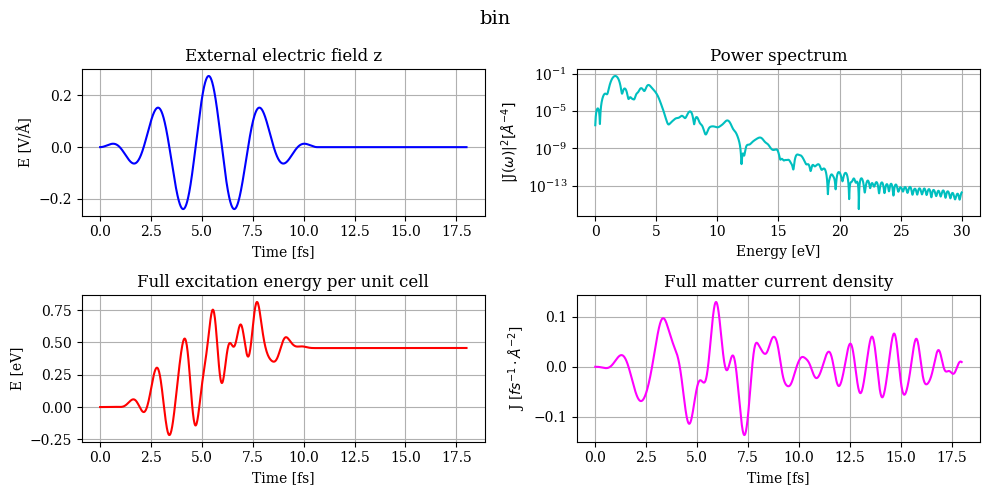

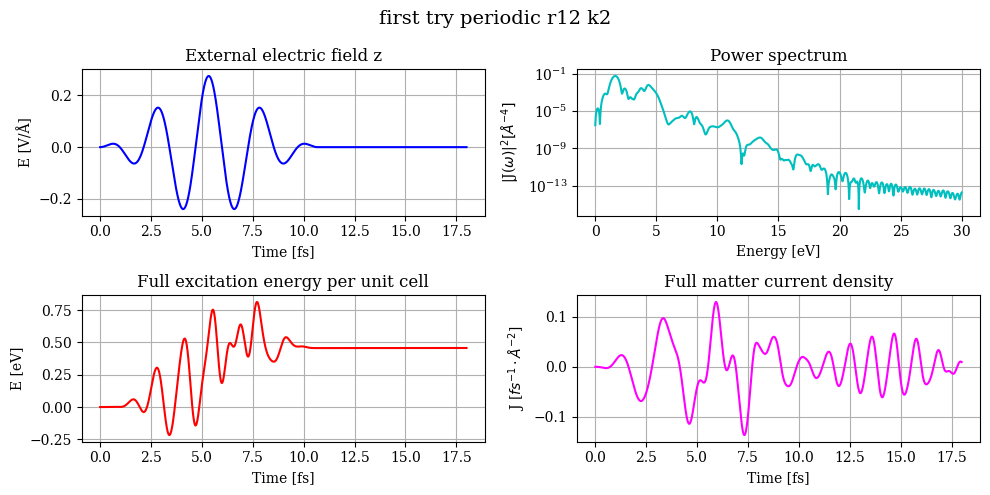

In [119]:
ax = 'z'
E, Jw2_am = plot_response_generated('bin', ax, part_name)
a = plot_response('first_try/periodic/r12_k2', ax)

### Nonlinear plots for generated

In [173]:
def plot_nonlinear_response_generated(folder, ax, part_name):
    
    # Загрузка данных, пропуская строки с комментариями (начинаются с #)
    data = pd.read_csv(
        folder + '/Si_' + part_name + '_rt.data',
        comment='#',
        delim_whitespace=True,
        header=None
    )
    
    # Назначим читаемые имена колонкам
    data.columns = [
        'time_fs',         # 1
        'Ac_ext_x',        # 2
        'Ac_ext_y',        # 3
        'Ac_ext_z',        # 4
        'E_ext_x',         # 5
        'E_ext_y',         # 6
        'E_ext_z',         # 7
        'Ac_tot_x',        # 8
        'Ac_tot_y',        # 9
        'Ac_tot_z',        #10
        'E_tot_x',         #11
        'E_tot_y',         #12
        'E_tot_z',         #13
        'Jm_x',         #14
        'Jm_y',         #15
        'Jm_z',         #16
    ]
    
    t = data['time_fs']
    Jm = data['Jm_'+ax]
    El_f = data['E_ext_z']
    
    # 1:Time[fs] 2:Ac_ext_x[fs*V/Angstrom] 3:Ac_ext_y[fs*V/Angstrom] 4:Ac_ext_z[fs*V/Angstrom]
    #5:E_ext_x[V/Angstrom] 6:E_ext_y[V/Angstrom] 7:E_ext_z[V/Angstrom] 8:Ac_tot_x[fs*V/Angstrom]
    # 9:Ac_tot_y[fs*V/Angstrom] 10:Ac_tot_z[fs*V/Angstrom] 11:E_tot_x[V/Angstrom]
    # 12:E_tot_y[V/Angstrom] 13:E_tot_z[V/Angstrom]  14:Jm_x[1/fs*Angstrom^2] 15:Jm_y[1/fs*Angstrom^2] 16:Jm_z[1/fs*Angstrom^2]
    
    
    # Построим графики
    plt.figure(figsize=(10, 8.5))

    # Общий заголовок для всей фигуры
    plt.suptitle(' '.join(re.split('[/_]', folder)), fontsize=14)
    
    # Первый график: внешнее поле по z
    plt.subplot(4, 2, 1)
    plt.plot(data['time_fs'], data['E_ext_z'], label='E_ext_z', color='blue')
    plt.xlabel('Time [fs]')
    plt.ylabel('E [V/Å]')
    plt.title('External electric field z')
    plt.grid(True)
    #plt.legend()
    
    # Второй график: дипольный момент по z
    plt.subplot(4, 2, 4)
    plt.plot(data['time_fs'], data['Jm_'+ax], label='Dipole Moment z', color='magenta')
    plt.xlabel('Time [fs]')
    plt.ylabel('J [$fs^{-1} \cdot Å^{-2}$]')
    plt.title('Full matter current density')
    plt.grid(True)
    #plt.legend()
    
    plt.tight_layout()
    
    # Загрузка данных с указанием имен столбцов
    energy_data = pd.read_csv(
        folder + '/Si_' + part_name + '_rt_energy.data',
        comment='#',
        delim_whitespace=True,
        header=None,
        names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
    )
    
    # Построение графика изменения энергии во времени
    plt.subplot(4, 2, 3)
    plt.plot(energy_data['Time_fs'], energy_data['Delta_E_eV'], label='ΔE = E_total - E_initial', color='r')
    plt.xlabel('Time [fs]')
    plt.ylabel('E [eV]')
    plt.title('Full excitation energy per unit cell')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()

    del_E = energy_data['Delta_E_eV']
    
    # Загрузка данных с указанием имен столбцов
    data = pd.read_csv(
        folder + '/Si_' + part_name + '_pulse.data',
        comment='#',
        delim_whitespace=True,
        header=None
    )
    
    # Назначим читаемые имена колонкам
    data.columns = [
        'energy_eV',           # 1
        'Re_Jm_x',             # 2
        'Re_Jm_y',             # 3
        'Re_Jm_z',             # 4
        'Im_Jm_x',             # 5
        'Im_Jm_y',             # 6
        'Im_Jm_z',             # 7
        'Abs2_Jm_x',           # 8
        'Abs2_Jm_y',           # 9
        'Abs2_Jm_z',           #10
        'Re_E_ext_x',          #11
        'Re_E_ext_y',          #12
        'Re_E_ext_z',          #13
        'Im_E_ext_x',          #14
        'Im_E_ext_y',          #15
        'Im_E_ext_z',          #16
        'Abs2_E_ext_x',        #17
        'Abs2_E_ext_y',        #18
        'Abs2_E_ext_z',        #19
        'Re_E_tot_x',          #20
        'Re_E_tot_y',          #21
        'Re_E_tot_z',          #22
        'Im_E_tot_x',          #23
        'Im_E_tot_y',          #24
        'Im_E_tot_z',          #25
        'Abs2_E_tot_x',        #26
        'Abs2_E_tot_y',        #27
        'Abs2_E_tot_z',        #28
    ]

    Jw2 = data['Abs2_Jm_'+ax]
    energy = data['energy_eV']
    # Построение графика для 1 и 10 колонки
    plt.subplot(4, 2, 2)
    plt.plot(data['energy_eV'], data['Abs2_Jm_'+ax], label='', color='c')
    plt.xlabel('Energy [eV]')
    plt.ylabel('|J($\omega)|^2 [Å^{-4}]$')
    plt.yscale('log')
    plt.title('Power spectrum')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()

        # Загрузка данных, пропуская строки с комментариями (начинаются с #)
    data = pd.read_csv(
        folder + '/Si_weak_' + part_name + '_rt.data',
        comment='#',
        delim_whitespace=True,
        header=None
    )
    
    # Назначим читаемые имена колонкам
    data.columns = [
        'time_fs',         # 1
        'Ac_ext_x',        # 2
        'Ac_ext_y',        # 3
        'Ac_ext_z',        # 4
        'E_ext_x',         # 5
        'E_ext_y',         # 6
        'E_ext_z',         # 7
        'Ac_tot_x',        # 8
        'Ac_tot_y',        # 9
        'Ac_tot_z',        #10
        'E_tot_x',         #11
        'E_tot_y',         #12
        'E_tot_z',         #13
        'Jm_x',         #14
        'Jm_y',         #15
        'Jm_z',         #16
    ]

    J_nonl = Jm - 10**3*data['Jm_'+ax]
    
    plt.subplot(4, 2, 6)
    plt.plot(data['time_fs'], Jm - 10**3*data['Jm_'+ax], label='', color='orange')
    plt.xlabel('Time [fs]')
    plt.ylabel('J [$fs^{-1} \cdot Å^{-2}$]')
    plt.title('Nonlinear matter current density')
    plt.grid(True)


    # Загрузка данных с указанием имен столбцов
    energy_data = pd.read_csv(
        folder + '/Si_weak_' + part_name + '_rt_energy.data',
        comment='#',
        delim_whitespace=True,
        header=None,
        names=['Time_fs', 'E_total_eV', 'Delta_E_eV']
    )
    
    # Построение графика изменения энергии во времени
    plt.subplot(4, 2, 5)
    plt.plot(energy_data['Time_fs'], del_E -10**6*energy_data['Delta_E_eV'], label='ΔE = E_total - E_initial', color='lime')
    plt.xlabel('Time [fs]')
    plt.ylabel('E [eV]')
    plt.title('Nonlinear excitation energy per unit cell')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()

    

    data = pd.read_csv(
    folder + '/Si_response_' + part_name + '_response.data',
    comment='#',
    delim_whitespace=True,
    header=None
)

    # Назначим читаемые имена колонкам
    data.columns = [
        'Energy_eV',         # 1
        'Re_sigma_x',        # 2
        'Re_sigma_y',        # 3
        'Re_sigma_z',        # 4
        'Im_sigma_x',        # 5
        'Im_sigma_y',        # 6
        'Im_sigma_z',        # 7
        'Re_eps_x',          # 8
        'Re_eps_y',          # 9
        'Re_eps_z',          #10
        'Im_eps_x',          #11
        'Im_eps_y',          #12
        'Im_eps_z',          #13
    ]
    E_resp = data['Energy_eV']
    Im_eps = data['Im_eps_'+ax]
    Re_eps = data['Re_eps_'+ax]

    plt.subplot(4, 2, 7)
    plt.plot(E_resp[100:], Re_eps[100:], label='', color='olive')
    plt.xlabel('Energy [eV]')
    plt.ylabel('Re$[\epsilon(\omega)]$')
    plt.title('Dielectric function')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()

    plt.subplot(4, 2, 8)
    plt.plot(E_resp[100:], Im_eps[100:], label='', color='black')
    plt.xlabel('Energy [eV]')
    plt.ylabel('Im$[\epsilon(\omega)]$')
    plt.title('Dielectric function')
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()

    plt.show()
    

    return t, energy, Jw2, El_f, J_nonl, Jm

### Plots

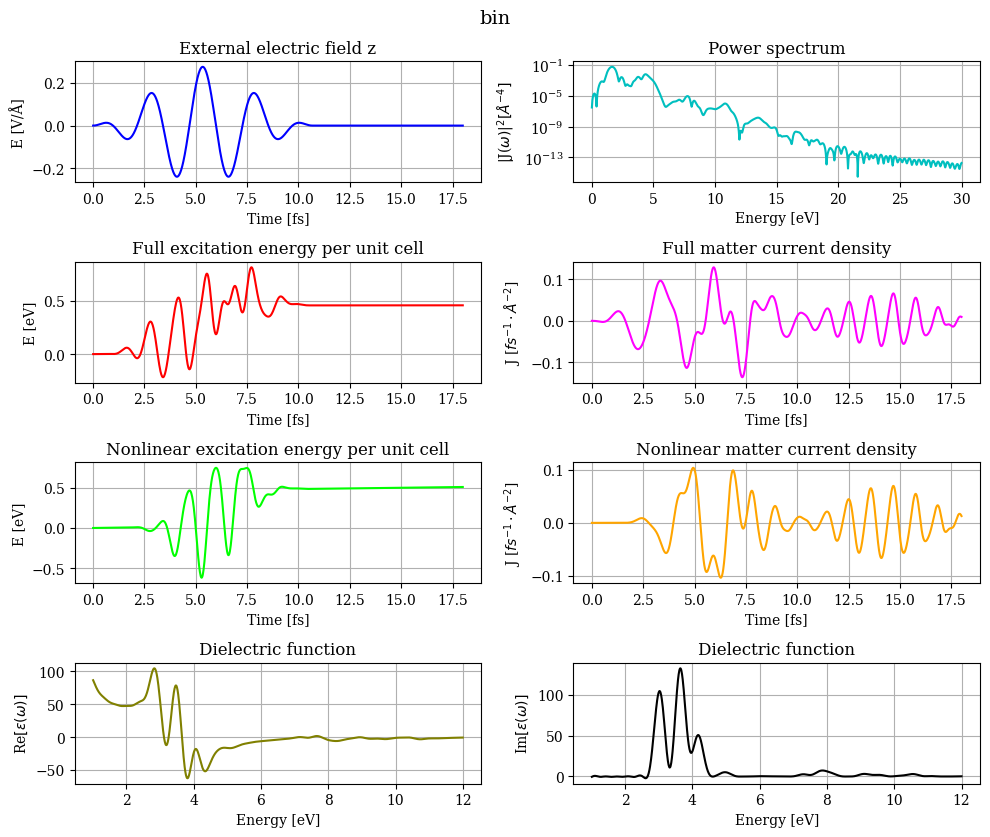

In [174]:
ax = 'z'
a = plot_nonlinear_response_generated('bin', ax, part_name)

### Draft

In [125]:
# НЕ ЗАБЫВАЙ В gs ФАЙЛЕ ИЗМЕНЯТЬ НА ! Index must correspond to   &atomic_reduced_coord (вроде все равно, так как не находит end)

# img1 = mpimg.imread('periodic_Si.png')
# img2 = mpimg.imread('disordered_Si.png')

# fig, axs = plt.subplots(1, 2, figsize=(12, 12))  # 1 строка, 2 столбца

# axs[0].imshow(img1)
# axs[0].axis('off')  # убрать оси
# axs[0].set_title("periodic")

# axs[1].imshow(img2)
# axs[1].axis('off')
# axs[1].set_title("disordered")
# plt.show()

In [174]:
# nx, ny, nz = 1, 1, 1

# # Формируем строки для каждого атома
# atoms_data = []
# for i in range(8):
#     atoms_data.append(f"  'Si'    {x[i]/2:.3f}    {y[i]/2:.3f}    {z[i]:.3f}    1")

# atoms_data.append('')

# for i in range(8):
#     atoms_data.append(f"  'Si'    {x[i]/2 + 0.5:.3f}    {y[i]/2:.3f}    {z[i]:.3f}    1")

# atoms_data.append('')


# # Открываем файл для записи
# with open('atoms_coordinates.txt', 'w') as f:
#     for line in atoms_data:
#         f.write(line + '\n')  # Пишем строку в файл и добавляем новую строку

# print("Координаты атомов сохранены в файл 'atoms_coordinates.txt'  \n")


# # Выводим результат
# for line in atoms_data:
#     print(line)

In [35]:
# nx_max = 3
# ny_max = 1
# nz_max = 2

# atoms_data = []

# for nx, ny, nz in np.ndindex(nx_max, ny_max, nz_max):
#     for i in range(8):
#         atoms_data.append(f"  'Si'    {x[i]/nx_max + nx/nx_max:.3f}    {y[i]/ny_max + ny/ny_max:.3f}    {z[i]/nz_max + nz/nz_max:.3f}    1") 
    
#     atoms_data.append('')

# # Открываем файл для записи
# with open('atoms_coordinates.txt', 'w') as f:
#     for line in atoms_data:
#         f.write(line + '\n')  # Пишем строку в файл и добавляем новую строку

# print("Координаты атомов сохранены в файл 'atoms_coordinates.txt'  \n")

# Выводим результат
# for line in atoms_data:
#     print(line)

In [98]:
# xc = 'TBmBJ'
# cval = 1.04
# "  cval = 1.04\n"

# start_idx = None

# # Ставим правильный потенциал
# if functional == 'TBmBJ':
#     print('yes')
#     for i, line in enumerate(lines):
#         if 'xc =' in line:
#             start_idx = i
#             break

# func_data = [f"  xc = 'TBmBJ'", f"  cval ={1.04:.2f}"]

# lines[start_idx] = [line + '\n' for line in func_data]

In [222]:
# nx_max = 2
# ny_max = 1
# nz_max = 1

# atoms_data = []
    
# for nx, ny, nz in np.ndindex(nx_max, ny_max, nz_max):
#     for i in range(8):
#         atoms_data.append(f"  'Si'    {x[i]/nx_max + nx/nx_max:.3f}    {y[i]/ny_max + ny/ny_max:.3f}    {z[i]/nz_max + nz/nz_max:.3f}    1") 
    
#     atoms_data.append('')


# #Выводим результат
# for line in atoms_data:
#     print(line)

In [271]:
# def create_cell(nx_max, ny_max, nz_max, dev): 
    
#     atoms_data = []
    
#     for nx, ny, nz in np.ndindex(nx_max, ny_max, nz_max):
#         for i in range(8):
            
#             rx, ry, rz = np.clip(np.random.normal(0, dev, 3),-2*dev ,2*dev)
    
#             xval = x[i]/nx_max + nx/nx_max
#             yval = y[i]/ny_max + ny/ny_max
#             zval = z[i]/nz_max + nz/nz_max
            
#             if 0 < xval+rx < 1:
#                 xval+=(rx/nx_max)
#             if 0 < yval+ry < 1:
#                 yval+=(ry/ny_max)
#             if 0 < zval+rz < 1:
#                 zval+=(rz/nz_max)
        
#             atoms_data.append(f"  'Si'    {xval:.3f}    {yval:.3f}    {zval:.3f}    1") 
        
#         atoms_data.append('')
    

#     return atoms_data

In [274]:



# input_type = 'response'

# nx_max = 1
# ny_max = 2
# nz_max = 1

# num_r = 12
# num_k = 2

# a = 1

# num_it  = 1000
# num_thr = 9

# functional = 'PZ'
# # func = 'PZ'

# dev = 0

# atoms_data = create_cell(nx_max, ny_max, nz_max, dev)


# if input_type == 'gs':
#     with open('base_inputs/Si_gs.inp', 'r') as file:
#         lines = file.readlines()


# if input_type == 'pulse' or input_type == 'weak_pulse':
#     with open('base_inputs/Si_rt_pulse.inp', 'r') as file:
#         lines = file.readlines()


# if input_type == 'response':
#     with open('base_inputs/Si_rt_response.inp', 'r') as file:
#         lines = file.readlines()


        
# if input_type == 'gs' or input_type == 'pulse':
#     # Заменяем строку для названия output файлов
#     for i, line in enumerate(lines):
#         if 'sysname' in line:
#             lines[i] = f"  sysname = 'Si_c{nx_max}{ny_max}{nz_max}_s0_r{num_r}_k{num_k}_a{a}_i{num_it}_t{num_thr}'\n"


# if input_type == 'weak_pulse':
#     # Заменяем строку для названия output файлов
#     for i, line in enumerate(lines):
#         if 'sysname' in line:
#             lines[i] = f"  sysname = 'Si_weak_c{nx_max}{ny_max}{nz_max}_s0_r{num_r}_k{num_k}_a{a}_i{num_it}_t{num_thr}'\n"

# if input_type == 'response':
#     # Заменяем строку для названия output файлов
#     for i, line in enumerate(lines):
#         if 'sysname' in line:
#             lines[i] = f"  sysname = 'Si_response_c{nx_max}{ny_max}{nz_max}_s0_r{num_r}_k{num_k}_a{a}_i{num_it}_t{num_thr}'\n"
    

# # Заменяем строку для al(1:3)
# for i, line in enumerate(lines):
#     if 'al(1:3)' in line:
#         lines[i] = f"  al(1:3) = {nx_max*5.43:.2f}d0, {ny_max*5.43:.2f}d0, {nz_max*5.43:.2f}d0\n"

# # Заменяем строку для num_rgrid(1:3)
# for i, line in enumerate(lines):
#     if 'num_rgrid(1:3)' in line:
#         lines[i] = f"  num_rgrid(1:3) = {nx_max*num_r:.0f}, {ny_max*num_r:.0f}, {nz_max*num_r:.0f}\n"

# # Заменяем строку для num_kgrid(1:3)
# for i, line in enumerate(lines):
#     if 'num_kgrid(1:3)' in line:
#         lines[i] = f"  num_kgrid(1:3) = {num_k/nx_max:.0f}, {num_k/ny_max:.0f}, {num_k/nz_max:.0f}\n"


# start_idx = None
# end_idx = None

# # Находим места начала и конца для замены количества атомов и электронов
# for i, line in enumerate(lines):
#     if 'nelem  =' in line:
#         start_idx = i
#     if '/' in line and start_idx is not None:
#         end_idx = i
#         break


# n_data = [f"  natom  = {8*nx_max*ny_max*nz_max:.0f}", f"  nelec  = {32*nx_max*ny_max*nz_max:.0f}", f"  nstate = {a*32*nx_max*ny_max*nz_max:.0f}"]

# # Заменяем блок координат
# lines[start_idx + 1:end_idx] = [line + '\n' for line in n_data]


# # Заменяем старые координаты атомов новыми
# start_idx = None
# end_idx = None

# # Находим места начала и конца для замены атомных координат
# for i, line in enumerate(lines):
#     if '&atomic_red_coor' in line:
#         start_idx = i
#     if '!--- Format' in line and start_idx is not None:
#         end_idx = i
#         break

# # Заменяем блок координат
# lines[start_idx + 1:end_idx] = [line + '\n' for line in atoms_data]


# if input_type == 'weak_pulse':
#     # Заменяем мощность
#     for i, line in enumerate(lines):
#         if 'I_wcm2_1 =' in line:
#             lines[i] = "  I_wcm2_1 = 1.0d6\n"


# if input_type == 'gs':
#     # Заменяем строку для nscf
#     for i, line in enumerate(lines):
#         if 'nscf' in line:
#             lines[i] = f"  nscf      = {num_it:.0f}\n"
    
#     # Заменяем строку для threshold
#     for i, line in enumerate(lines):
#         if 'threshold =' in line:
#             lines[i] = f"  threshold = 1.0d-{num_thr:.0f}\n"

# fold_name = f"  c{nx_max}{ny_max}{nz_max}_s0_r{num_r}_k{num_k}_a{a}_i{num_it}_t{num_thr}"

# if input_type == 'gs':
#     os.mkdir("generated/"+fold_name)

# if input_type == 'gs':
#     # Сохраняем изменения в файл
#     with open("generated/" + fold_name + f"/Si_gs_c{nx_max}{ny_max}{nz_max}_s0_r{num_r}_k{num_k}_a{a}_i{num_it}_t{num_thr}.inp", 'w') as file:
#         file.writelines(lines)

# if input_type == 'pulse':
#     # Сохраняем изменения в файл
#     with open("generated/" + fold_name + f"/Si_rt_pulse_c{nx_max}{ny_max}{nz_max}_s0_r{num_r}_k{num_k}_a{a}_i{num_it}_t{num_thr}.inp", 'w') as file:
#         file.writelines(lines)

# if input_type == 'weak_pulse':
#     # Сохраняем изменения в файл
#     with open("generated/" + fold_name + f"/Si_weak_rt_pulse_c{nx_max}{ny_max}{nz_max}_s0_r{num_r}_k{num_k}_a{a}_i{num_it}_t{num_thr}.inp", 'w') as file:
#         file.writelines(lines)

# if input_type == 'response':
#     # Сохраняем изменения в файл
#     with open("generated/" + fold_name + f"/Si_response_rt_pulse_c{nx_max}{ny_max}{nz_max}_s0_r{num_r}_k{num_k}_a{a}_i{num_it}_t{num_thr}.inp", 'w') as file:
#         file.writelines(lines)

In [41]:
# input_type = 'response'

# nx_max = 1
# ny_max = 2
# nz_max = 1

# num_r = 12
# num_k = 2

# a = 1

# num_it  = 1000
# num_thr = 9

# # functional = 'PZ'
# # func = 'PZ'

# dev = 0

In [1]:
    # # Заменяем functional
    # for i, line in enumerate(lines):
    #     if 'al(1:3)' in line:
    #         lines[i] = f"  al(1:3) = {nx_max*5.43:.2f}d0, {ny_max*5.43:.2f}d0, {nz_max*5.43:.2f}d0\n"